In [ ]:
Let's create a ML model to predict rent of house.
Here is the data - Link
Make sure you do data wrangling & get useful insights/visualizations
Create models using Linear Regressions or variations of it
Think harder about data preprocessing

# Data Preprocessing and Expolaration:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv(r"E:\Edyoda data\Linear Model house_rental_data.csv")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [20]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [21]:
df.isna().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

# Data Visualization:


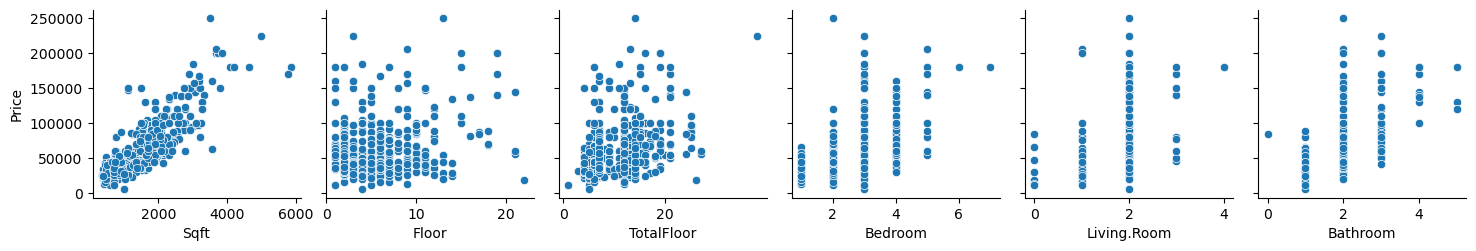

In [25]:

sns.pairplot(df, x_vars=['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom'], y_vars=['Price'], kind='scatter')
plt.show()


### Heatmap

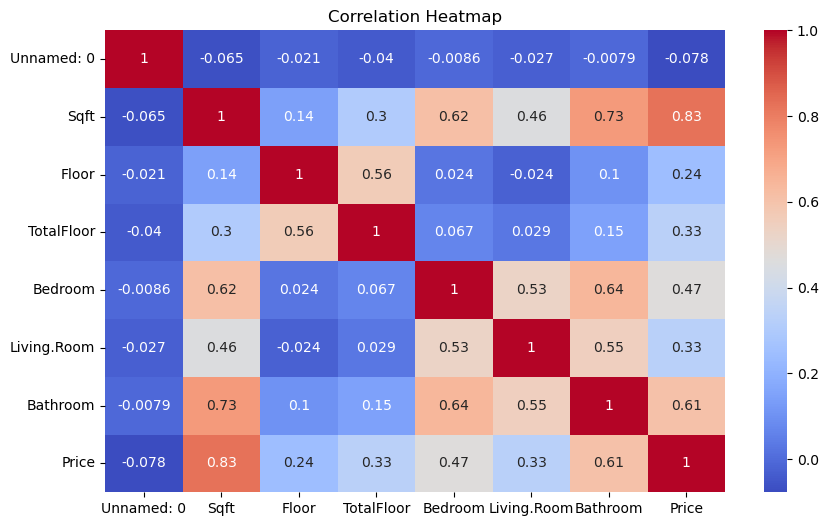

In [46]:
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x800 with 0 Axes>

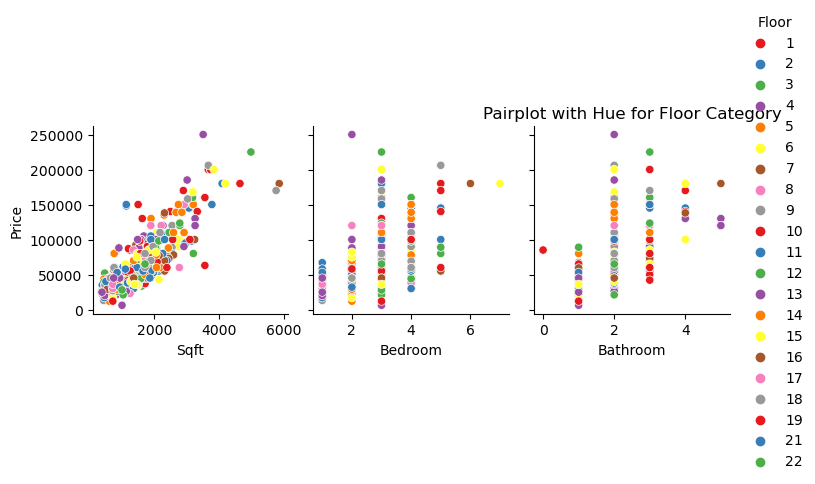

In [50]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=['Sqft', 'Bedroom', 'Bathroom'], y_vars=['Price'], hue='Floor', kind='scatter', palette='Set1')
plt.title('Pairplot with Hue for Floor Category')
plt.show()


In [26]:
X = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
y = df["Price"]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr

LinearRegression()

In [30]:
lnr.fit(X_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

y_pred = lnr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 14845.493269168559
Mean Squared Error: 373611643.0582842
R-squared: 0.7101964960563817
